In [ ]:
# https://www.kaggle.com/datasets/rakeshrau/social-network-ads

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
print(min(df['Age']))    #smallest value in the age column
print(max(df['Age']))    #largest value in the age column

18
60


In [ ]:
print(min(df['EstimatedSalary']))    #minimum value in the salary column
print(max(df['EstimatedSalary']))    #maximum value in the salary column

15000
150000


In [ ]:
#split the dataset 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(300, 2)

In [ ]:
0.75*400

300.0

In [ ]:
0.25*400

100.0

In [ ]:
import numpy as np 

In [ ]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([189, 111]))
(array([0, 1]), array([68, 32]))


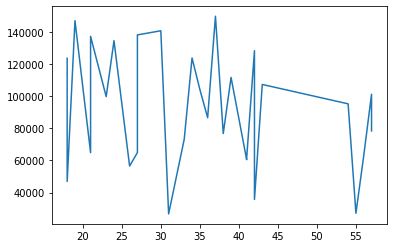

In [ ]:
# example plot
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(0)
x1 = np.random.randint(18,60,30)
x1 = np.sort(x1)
x2 = np.random.randint(15000,150000,30)
plt.plot(x1,x2)
plt.show()

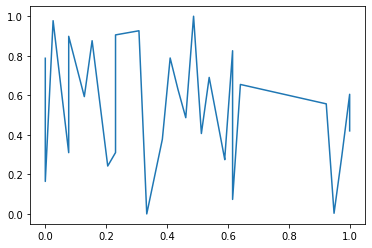

In [ ]:
x1min = min(x1)
x1max = max(x1)

x2min = min(x2)
x2max = max(x2)

#applying normalization formula
x1norm = (x1 - x1min) / (x1max - x1min)
x2norm = (x2 - x2min) / (x2max - x2min)

plt.plot(x1norm,x2norm)
# normalization increases the speed the machine,uses less memory,more efficiency

In [ ]:
x_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [ ]:
#normalization is done only to input data
#sklearn implementation of MinMaxScaler

from sklearn.preprocessing import MinMaxScaler 
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
x_train

array([[0.61904762, 0.17777778],
       [0.33333333, 0.77777778],
       [0.47619048, 0.25925926],
       [0.33333333, 0.88888889],
       [0.80952381, 0.04444444],
       [0.83333333, 0.65925926],
       [0.5       , 0.2       ],
       [0.47619048, 0.34074074],
       [0.42857143, 0.25925926],
       [0.42857143, 0.35555556],
       [0.4047619 , 0.07407407],
       [0.4047619 , 0.25925926],
       [0.57142857, 0.42962963],
       [0.69047619, 0.25185185],
       [0.97619048, 0.1037037 ],
       [0.73809524, 0.37037037],
       [0.64285714, 0.85925926],
       [0.30952381, 0.54814815],
       [0.66666667, 0.4962963 ],
       [0.69047619, 0.26666667],
       [0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred  #predicted output 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
print(np.unique(y_pred,return_counts=True))

(array([0, 1]), array([77, 23]))


In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([68, 32]))


In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.89

In [ ]:
# metrics for classification - confusion matrix , accuracy, precision, recall,f1-score,   classification_report  

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[67,  1],
       [10, 22]])

In [ ]:
# TRUE POSITIVE (67)  - 67 values correctly predicted as 1
# FALSE POSITIVE (1)  -  1 value wrongly predicted as 1 
# FALSE NEGATIVE (10) - 10 values wrongly predicted as 0
# TRUE NEGATIVE (22)  - 22 values correctly predicted as 0

# POSITIVE - 1
# NEGATIVE - 0

# TRUE - correctly predicted 
# FALSE - Wrongly predicted 

In [ ]:
# If the dataset is balanced (purchased - 1, not purchased -0)(very almost equal in number)then only accuracy can be used
# If the dataset is imbalanced values not almost equal in number then accuracy, precision,recall, f1-score)


In [ ]:
# ACCURACY 
accuracy = (67+22)/(67+1+10+22)
accuracy

0.89

In [ ]:
#PRECISION
precision = (67)/(67+1)
precision

0.9852941176470589

In [ ]:
#RECALL 
recall = 67/(67+10)
recall

0.8701298701298701

In [ ]:
#F1-SCORE 
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.9241379310344828

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [ ]:
# K NEAREST NEIGHBORS ALGORITHM  (KNN)